In [1]:
import pandas as pd

In [63]:
#Importing the dataset
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [64]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [65]:
#Checking for the categorical values in the 'status'column
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [66]:
#Univariate Data Analysis
#Extracting the data where status is 'placed' and 'Not Placed'and store it in df_Notplaced 
df_placed = df.loc[df['status']=='Placed']
df_Notplaced =df.loc[df['status']=='Not Placed']

In [6]:
df_placed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [7]:
import matplotlib.pyplot as plt
import numpy as np

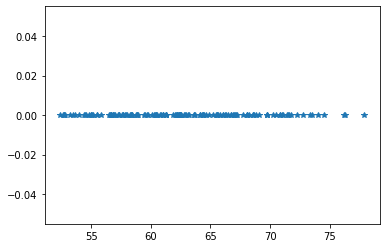

In [8]:
#plotting the data using one column from the df_placed and df_Notplaced dataframes
plt.plot(df_placed['mba_p'],np.zeros_like(df_placed['mba_p']),'*')

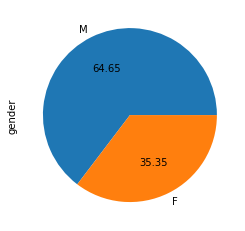

In [9]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f');

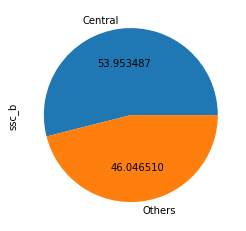

In [10]:
#Secondary School Specialization
df['ssc_b'].value_counts().plot(kind='pie',autopct='%2f');

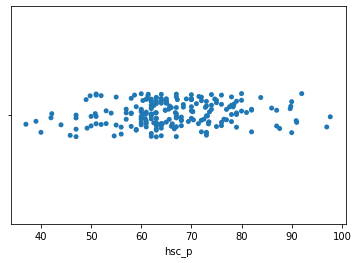

In [13]:
#Univariate analysis for higher secomndary school percentage
import seaborn as sns

sns.stripplot(x=df['hsc_p']);

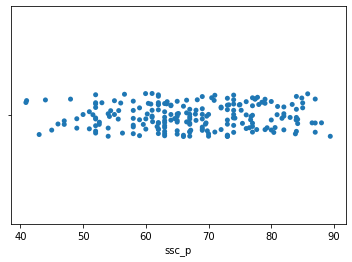

In [14]:
#Secondary School percentage
sns.stripplot(x=df['ssc_p']);

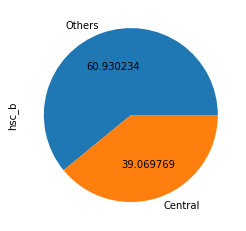

In [15]:
#Higher secondary school specialization
df['hsc_b'].value_counts().plot(kind='pie',autopct='%2f');

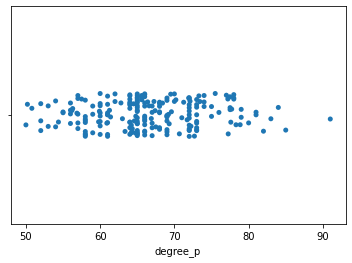

In [16]:
#degree Specialization
sns.stripplot(x=df['degree_p']);

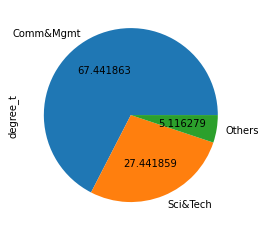

In [17]:
#Degree spcialization
df['degree_t'].value_counts().plot(kind='pie',autopct='%2f');

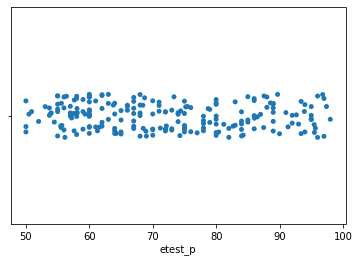

In [18]:
#Competitive exam percentage
sns.stripplot(x=df['etest_p']);

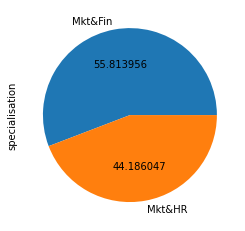

In [19]:
#Specialization
df['specialisation'].value_counts().plot(kind='pie',autopct='%2f');

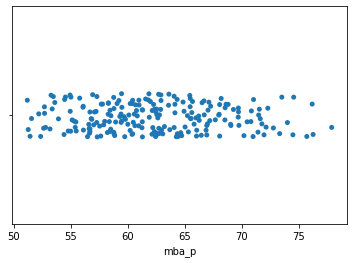

In [20]:
#mba percentage
sns.stripplot(x=df['mba_p']);

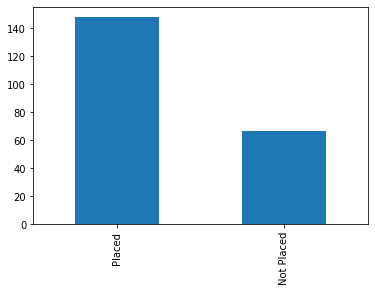

In [21]:
#Status
df['status'].value_counts().plot(kind='bar')

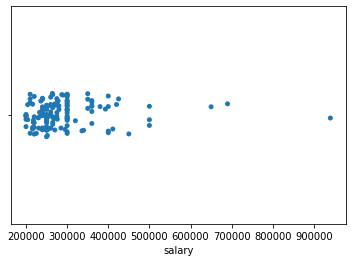

In [22]:
#Salary
sns.stripplot(x=df['salary']);

In [23]:
#Bivariate Analysis
#Using Scatter plot
#Analysis between x="mba_p",y="salary",grouping(hue) by'specialisation'
import seaborn as sns

In [24]:
#Checking if all the students that are not placed have null salary
df['status'][df['salary'].isnull()].unique()

array(['Not Placed'], dtype=object)

In [25]:
drop=df.dropna()

In [26]:
#Checking for null values
df['salary'].fillna(0,inplace=True)
df.isnull().sum()


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

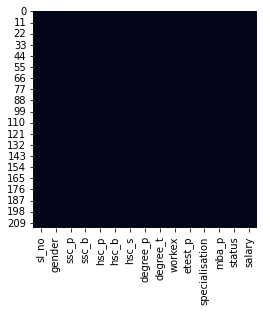

In [27]:
#Treating missing values
plt.figure(figsize=(4,4))
sns.heatmap(df.isnull(),cbar=False);

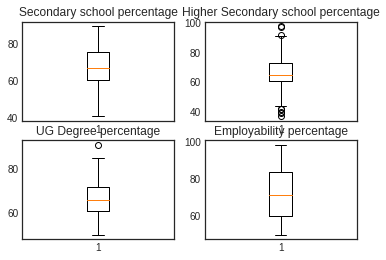

In [28]:
#There are no null values
#Handling Outliers
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage');
ax.set_title('Employability percentage');

In [29]:
#Majority of outliers are present in 'hsc_p'.
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    
#IQR is interquartile range. 

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)
filtered_df=df.loc[filter]

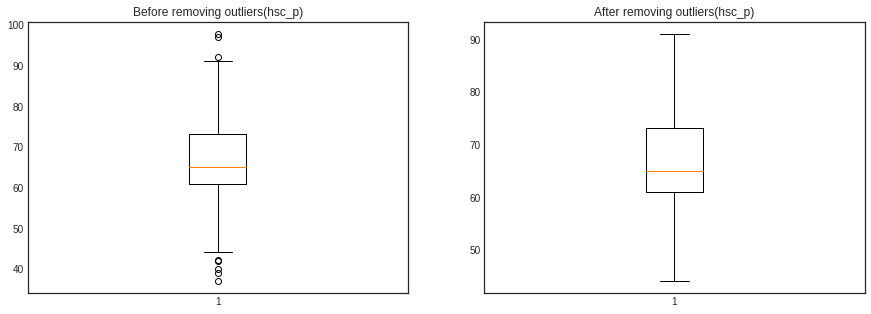

In [30]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(df['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(filtered_df['hsc_p'])
ax.set_title('After removing outliers(hsc_p)');

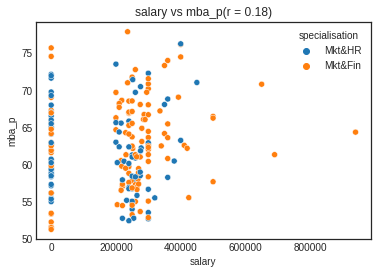

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.title('salary vs mba_p(r = {0:0.2f})'.format(pearsonr(drop['salary'],drop['mba_p'])[0]))
sns.scatterplot(x="salary",y="mba_p",data = df, hue='specialisation')

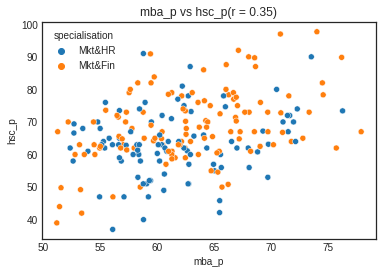

In [33]:
#Aanlysis between Analysis between x="mba_p",y="salary", grouping(hue) by 'workex'¶
plt.title('mba_p vs hsc_p(r = {0:0.2f})'.format(pearsonr(df['mba_p'],df['hsc_p'])[0]))
sns.scatterplot(x="mba_p",y="hsc_p",data = df, hue='specialisation')

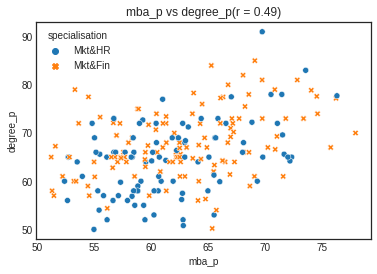

In [34]:
#Analysis between x="mba_p",y="salary", grouping by 'specialisation' and creating different markers for the legends using style
plt.title('mba_p vs degree_p(r = {0:0.2f})'.format(pearsonr(drop['mba_p'],drop['degree_p'])[0]))
sns.scatterplot(x="mba_p", y="degree_p",hue="specialisation", style="specialisation", data=df)
plt.show()

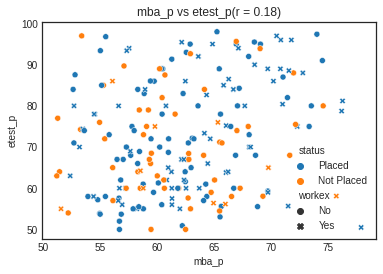

In [35]:
plt.title('mba_p vs etest_p(r = {0:0.2f})'.format(pearsonr(drop['mba_p'],drop['salary'])[0]))
sns.scatterplot(x="mba_p", y="etest_p",hue="status", style="workex", data=df)
plt.show()

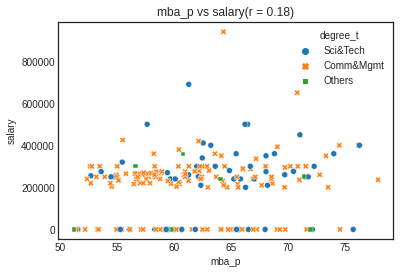

In [36]:
plt.title('mba_p vs salary(r = {0:0.2f})'.format(pearsonr(drop['mba_p'],drop['salary'])[0]))
sns.scatterplot(x="mba_p", y="salary",hue="degree_t", style="degree_t", data=df)
plt.show()

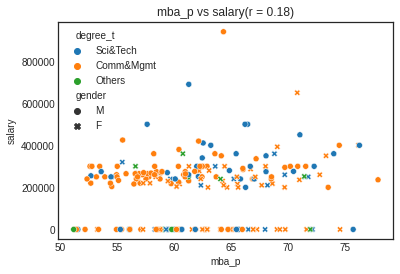

In [37]:
plt.title('mba_p vs salary(r = {0:0.2f})'.format(pearsonr(drop['mba_p'],drop['salary'])[0]))
sns.scatterplot(x="mba_p", y="salary",hue="degree_t", style="gender", data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


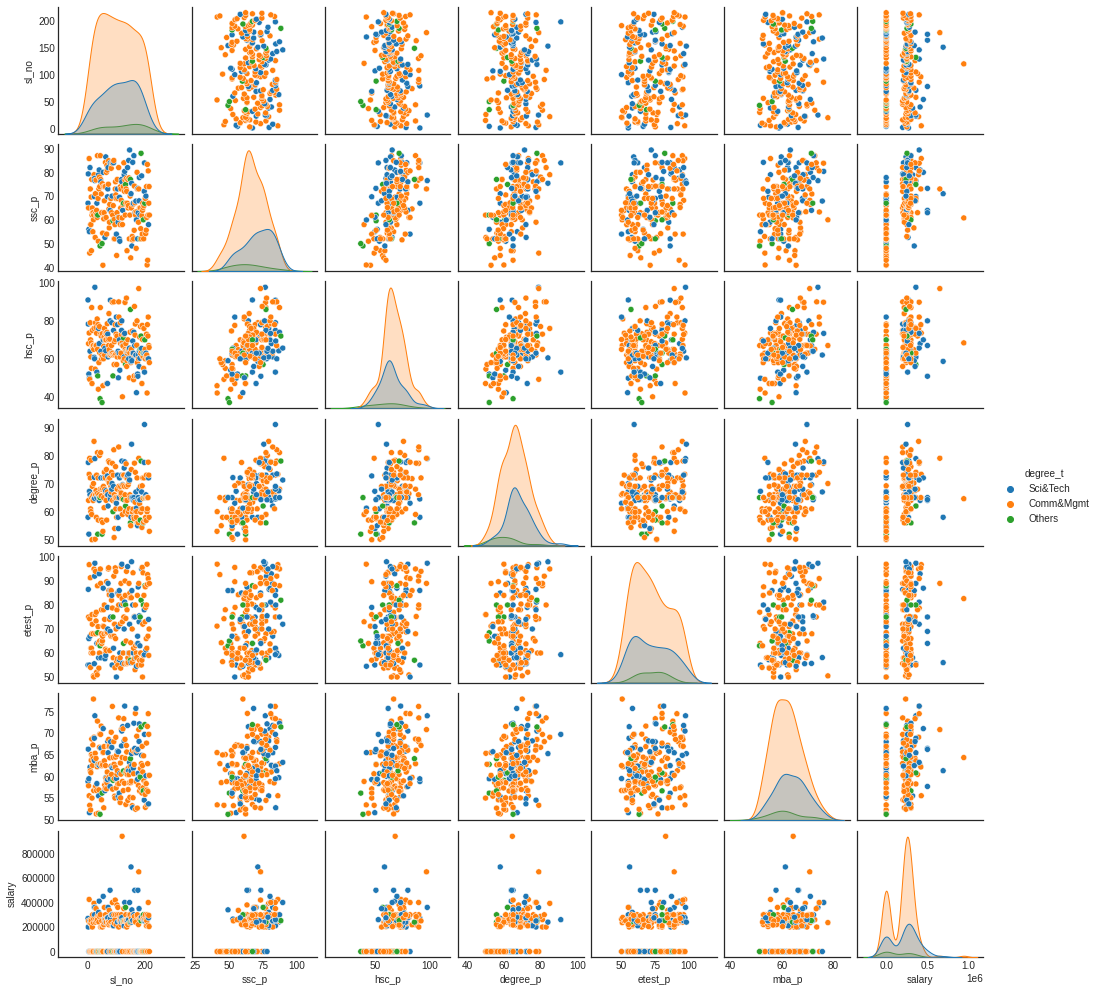

In [38]:
sns.pairplot(df,hue='degree_t',size=2)
plt.show()

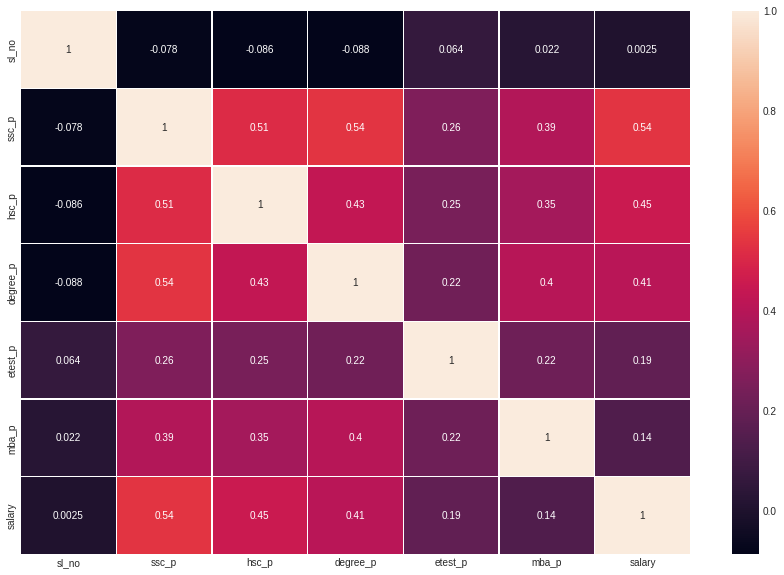

In [39]:
#Heatmap to check the correlation among various percentages
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.2)

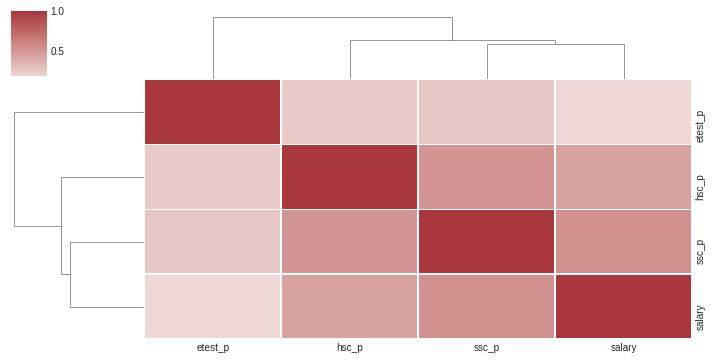

In [40]:
#CORRELATION BETWEEN SALARY,EMPLOYIBILITY TEST %,SECONDARY EDUCATION%,HIGHER SECONDARY EDUCATION %
cor = df.loc[:,["hsc_p","ssc_p",'etest_p',"salary"]]
sns.clustermap(cor.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(10, 5))

In [41]:
encoding_cat = pd.get_dummies(df)

In [42]:
encoding_cat.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

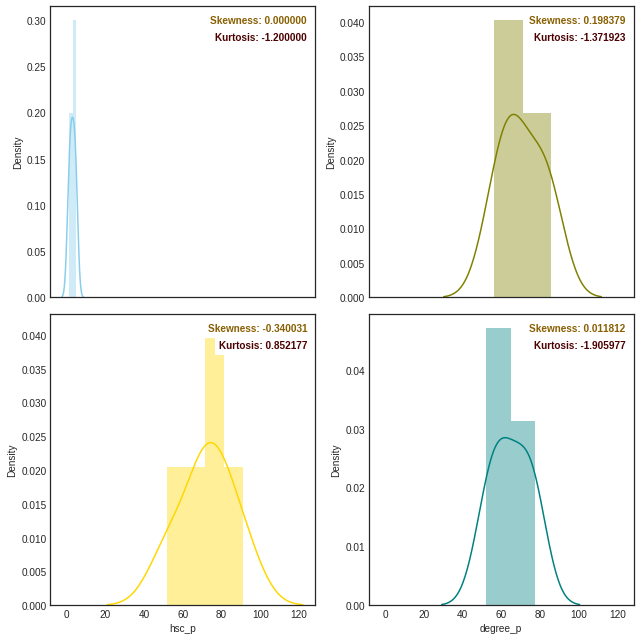

In [43]:
#plotting the Skewness plots and identifying the outlier values
f, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True)

sns.distplot(encoding_cat.head().iloc[:,0], color="skyblue", ax=axes[0,0])
sns.distplot(encoding_cat.head().iloc[:,1], color="olive", ax=axes[0,1])
sns.distplot(encoding_cat.head().iloc[:,2], color="gold", ax=axes[1,0])
sns.distplot(encoding_cat.head().iloc[:,3], color="teal", ax=axes[1,1])

for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % encoding_cat.head().iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % encoding_cat.head().iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [44]:
#Calculating th skewness
print("The skewness is:" , df.skew())

The skewness is: sl_no       0.000000
ssc_p      -0.132649
hsc_p       0.163639
degree_p    0.244917
etest_p     0.282308
mba_p       0.313576
salary      0.446646
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [45]:
#Calculating the Kurtosis
print("The Kurtosis is: ",df.kurtosis())

The Kurtosis is:  sl_no      -1.200000
ssc_p      -0.607510
hsc_p       0.450765
degree_p    0.052143
etest_p    -1.088580
mba_p      -0.470723
salary      1.655889
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [67]:
#let's do the preprocessing steps to build a model

dataset = df
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


This dataset has 215 entries with many object datatype columns

In [68]:
#Let's see the unique values of object datatype columns

print(dataset['status'].unique())
print(dataset['gender'].unique())
print(dataset['ssc_b'].unique())
print(dataset['hsc_b'].unique())
print(dataset['hsc_s'].unique())
print(dataset['degree_t'].unique())
print(dataset['workex'].unique())
print(dataset['specialisation'].unique())


['Placed' 'Not Placed']
['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']


In [70]:
#Let's encode them
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
dataset['status']= Label.fit_transform(dataset['status'])
dataset['gender']= Label.fit_transform(dataset['gender'])
dataset['ssc_b']= Label.fit_transform(dataset['ssc_b'])
dataset['hsc_b']= Label.fit_transform(dataset['hsc_b'])
dataset['hsc_s']= Label.fit_transform(dataset['hsc_s'])
dataset['degree_t']= Label.fit_transform(dataset['degree_t'])
dataset['workex']= Label.fit_transform(dataset['workex'])
dataset['specialisation']= Label.fit_transform(dataset['specialisation'])
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [72]:
#Let's see the encoded values

print(dataset['status'].unique())
print(dataset['gender'].unique())
print(dataset['ssc_b'].unique())
print(dataset['hsc_b'].unique())
print(dataset['hsc_s'].unique())
print(dataset['degree_t'].unique())
print(dataset['workex'].unique())
print(dataset['specialisation'].unique())

[1 0]
[1 0]
[1 0]
[1 0]
[1 2 0]
[2 0 1]
[0 1]
[1 0]


In [74]:
#let's check for null values

dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [77]:
#let's replace the null values of salary with '0'

dataset['salary'].fillna('0', inplace = True)
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [79]:
#let's now again check for null values in salary

dataset['salary'].isnull().sum()

0

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

X = dataset.iloc[:, 1:-1].values  #let's ignore the sl_no and salary column and take the rest of the values as the input
y = dataset.iloc[:, -1].values  #let's take the salary column as output values which are to be predicted

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [90]:
#Let's check the accuracy score of the model

from sklearn.metrics import r2_score
r2_score (y_test,y_pred)*100

79.95953614441451